<a href="https://colab.research.google.com/github/dapsavoie/agricultural_satellite_classifier/blob/master/Quick_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

import os

import tensorflow as tf

import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
train = pd.read_csv('/content/drive/My Drive/agri_vision/final_encoded.csv')

#strip train index
train['index'] = train['index'].str.rstrip('.png')
train.drop(columns='Unnamed: 0', inplace=True)

In [0]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/agri_vision/Agriculture-Vision/85%_loss_65%_binary_sequential.h5')

weed_cluster (0.746)
waterway (0.239)
double_planter (0.00869)


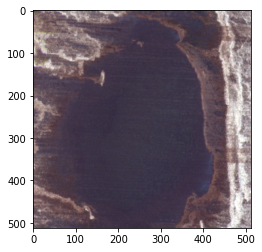

In [26]:
# Initiate load img 

img = image.load_img('/content/drive/My Drive/agri_vision/Agriculture-Vision/test/test_rgb/1TB7MNWD8_4053-5308-4565-5820.jpg', target_size=None)
img = image.img_to_array(img)
img = img/255
classes = np.array(train.columns[1:])
proba = model.predict(img.reshape(1, 512, 512, 3))
top_3 = np.argsort(proba[0])[:-4:-1]

import matplotlib.pyplot as plt

for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

weed_cluster (0.856)
waterway (0.144)
double_planter (0.000305)


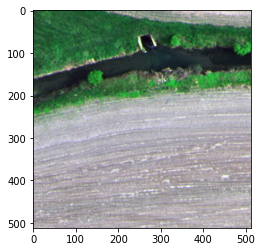

In [24]:
import matplotlib.pyplot as plt

for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)